# Road Analytics Prefiltered 

## for multiple road conditions 

In [1]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
import pandas as pd

In [3]:
data = np.loadtxt("dataset_modified_2/dataset_prefiltered.csv",delimiter=",")

In [4]:
data.shape

(1800, 5)

In [5]:
x = data[:,0:-1]
y = data[:,-1]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x.shape)
print(y.shape)

(1800, 4)
(1800,)


In [6]:
# size of input
x.shape[1]

4

In [7]:
print(x_train.shape)
print(x_test.shape)

(1440, 4)
(360, 4)


In [8]:
count_of_0=0 
for i in y:
    if (i==0) :
        count_of_0=count_of_0+1
print("0 :",count_of_0)
count_of_1=0 
for i in y:
    if (i==1) :
        count_of_1=count_of_1+1
print("1 :",count_of_1)
count_of_2=0 
for i in y:
    if (i==2) :
        count_of_2=count_of_2+1
print("2 :",count_of_2)

0 : 600
1 : 598
2 : 602


In [9]:
y_train1 = y_train
y_test1 = y_test

In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [11]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [12]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [13]:
y_train.shape[1]

3

# Creating the model

In [14]:
model = Sequential()
model.add(Dense(16,input_dim=x.shape[1],activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1],activation='softmax'))

# Compiling and Training the model 

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [16]:
learning_rate = 0.001

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
epochs = 100
history = model.fit(x_train, y_train, batch_size=30, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/100
48/48 [==============================] - 0s 7ms/step - loss: 0.8925 - accuracy: 0.5424 - val_loss: 0.8164 - val_accuracy: 0.6694
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7908 - accuracy: 0.6771 - val_loss: 0.7063 - val_accuracy: 0.6944
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.7069 - val_loss: 0.6460 - val_accuracy: 0.7083
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7160 - val_loss: 0.6275 - val_accuracy: 0.7222
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7354 - val_loss: 0.5810 - val_accuracy: 0.7333
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7326 - val_loss: 0.5708 - val_accuracy: 0.7361
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7465 - val_loss: 0.5448 - val_accuracy: 0.7444
Epoch 8/100
4

Epoch 59/100
48/48 [==============================] - 0s 5ms/step - loss: 0.3120 - accuracy: 0.8750 - val_loss: 0.3034 - val_accuracy: 0.8694
Epoch 60/100
48/48 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8694 - val_loss: 0.3069 - val_accuracy: 0.8778
Epoch 61/100
48/48 [==============================] - 0s 4ms/step - loss: 0.3308 - accuracy: 0.8715 - val_loss: 0.2950 - val_accuracy: 0.8806
Epoch 62/100
48/48 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.8826 - val_loss: 0.3441 - val_accuracy: 0.8611
Epoch 63/100
48/48 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.8694 - val_loss: 0.2978 - val_accuracy: 0.8722
Epoch 64/100
48/48 [==============================] - 0s 4ms/step - loss: 0.3236 - accuracy: 0.8722 - val_loss: 0.3052 - val_accuracy: 0.8861
Epoch 65/100
48/48 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.8604 - val_loss: 0.2996 - val_accuracy: 0.8889
Epoch 

# Plotting graphs for accuracy 

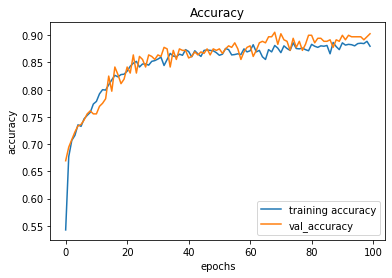

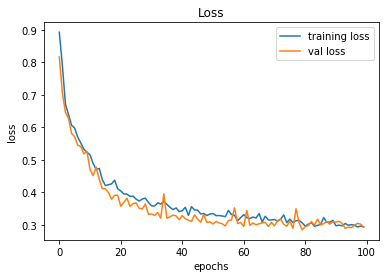

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
pred_train = model.predict_classes(x_train)
count0=0
count1=0
count2=0
for i in pred_train:
    if(i==0):
        count0=count0+1
    if(i==1):
        count1=count1+1
    if(i==2):
        count2=count2+1

print("class 0 :",count0)        
print("class 1 :",count1)    
print("class 2 :",count2) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
class 0 : 498
class 1 : 483
class 2 : 459


In [19]:
x_test.shape[0]

360

In [20]:
# analysis on training data
pred_train = model.predict_classes(x_train)

# good road
count1=0
count2=0
count3=0

for i in range(0,x_train.shape[0]):
    if(pred_train[i]==0 and int(y_train1[i])==0):
        count1 = count1+1
    elif(int(y_train1[i])==0): 
        count2 = count2+1
total = count1+count2
print("*************************************")
print("Analysis on training data for good road")
print()
print("true detection for  :",(count1/total)*100,"%")
print("false detection for :",(count2/total)*100,"%")

# medium road
count1=0
count2=0
count3=0

for i in range(0,x_train.shape[0]):
    if(pred_train[i]==1 and int(y_train1[i])==1):
        count1 = count1+1
    elif(int(y_train1[i])==1): 
        count2 = count2+1
total = count1+count2
print("*************************************")
print("Analysis on training data for medium road")
print()
print("true detection for  :",(count1/total)*100,"%")
print("false detection for :",(count2/total)*100,"%")

# bad road 
count1=0
count2=0
count3=0

for i in range(0,x_train.shape[0]):
    if(pred_train[i]==2 and int(y_train1[i])==2):
        count1 = count1+1
    elif(int(y_train1[i])==2): 
        count2 = count2+1
total = count1+count2
print("*************************************")
print("Analysis on training data for bad road")
print()
print("true detection for  :",(count1/total)*100,"%")
print("false detection for :",(count2/total)*100,"%")

*************************************
Analysis on training data for good road

true detection for  : 96.65970772442589 %
false detection for : 3.3402922755741122 %
*************************************
Analysis on training data for medium road

true detection for  : 84.77366255144034 %
false detection for : 15.22633744855967 %
*************************************
Analysis on training data for bad road

true detection for  : 88.42105263157895 %
false detection for : 11.578947368421053 %


In [57]:
# analysis on test data
pred_test = model.predict_classes(x_test)

# good road
count1=0
count2=0
count3=0

for i in range(0,x_test.shape[0]):
    
    if (int(y_test1[i])==0 and pred_test[i]==0):
        count1 = count1+1
    elif(int(y_test1[i])==0 and pred_test[i]==1): 
        count2 = count2+1
    elif(int(y_test1[i])==0 and pred_test[i]==2): 
        count3 = count3+1
total = count1+count2+count3
print("***************************************************************")
print("Analysis on test data for good road")
print()
print("true detection                        :",(count1/total)*100,"%")
print("false detection - medium is predicted :",(count2/total)*100,"%")
print("false detection - bad is predicted    :",(count3/total)*100,"%")

# medium road
count1=0
count2=0
count3=0

for i in range(0,x_test.shape[0]):
    
    if (int(y_test1[i])==1 and pred_test[i]==0):
        count1 = count1+1
    elif(int(y_test1[i])==1 and pred_test[i]==1): 
        count2 = count2+1
    elif(int(y_test1[i])==1 and pred_test[i]==2): 
        count3 = count3+1
total = count1+count2+count3
print("***************************************************************")
print("Analysis on test data for medium road")
print()
print("true detection for                    :",(count2/total)*100,"%")
print("false detection - good is predicted   :",(count1/total)*100,"%")
print("false detection - bad is predicted    :",(count3/total)*100,"%")


# bad road 
count1=0
count2=0
count3=0

for i in range(0,x_test.shape[0]):
    
    if (int(y_test1[i])==2 and pred_test[i]==0):
        count1 = count1+1
    elif(int(y_test1[i])==2 and pred_test[i]==1): 
        count2 = count2+1
    elif(int(y_test1[i])==2 and pred_test[i]==2): 
        count3 = count3+1
total = count1+count2+count3
print("***************************************************************")
print("Analysis on test data for bad road")
print()
print("true detection for                       :",(count3/total)*100,"%")
print("false detection - good is predicted      :",(count1/total)*100,"%")
print("false detection - medium is predicted    :",(count2/total)*100,"%")

***************************************************************
Analysis on test data for good road

true detection                        : 95.0413223140496 %
false detection - medium is predicted : 4.132231404958678 %
false detection - bad is predicted    : 0.8264462809917356 %
***************************************************************
Analysis on test data for medium road

true detection for                    : 92.85714285714286 %
false detection - good is predicted   : 0.8928571428571428 %
false detection - bad is predicted    : 6.25 %
***************************************************************
Analysis on test data for bad road

true detection for                       : 83.46456692913385 %
false detection - good is predicted      : 0.0 %
false detection - medium is predicted    : 16.535433070866144 %


In [22]:
from sklearn.metrics import accuracy_score

# prediction on training data
label = np.array(y_train1)
pred_train = model.predict_classes(x_train)
print("Accuracy on training data = ",accuracy_score(label,pred_train)*100,"%")

# prediction on test data
label = np.array(y_test1)
pred_test = model.predict_classes(x_test)
print("Accuracy on test data = ",accuracy_score(label,pred_test)*100,"%")

Accuracy on training data =  89.93055555555556 %
Accuracy on test data =  90.27777777777779 %


# Loading Model

In [46]:
# model.save('road_analytics_model_prefiltered.h5')

In [47]:
# from keras.models import load_model
# model = load_model('road_analytics_model_prefiltered.h5')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [49]:
label=np.array(y_train)
print(label.shape)

(1440, 3)


In [50]:
samples = np.array([data[1585][0:-1]])    
print(model.predict(samples))
prediction = model.predict_classes(samples)
print(prediction)

[[2.4639570e-14 2.2667082e-02 9.7733295e-01]]
[2]


In [52]:
samples = np.array([[0.028632,3.25E-05,0.0013093,0.00066799]])      
print(samples)
prediction = model.predict_classes(samples)
print(prediction)

[[2.8632e-02 3.2500e-05 1.3093e-03 6.6799e-04]]
[0]


In [53]:
samples = np.array([[0.02464,0.018678,0.0095863,0.0089315]])      
print(samples)
prediction = model.predict_classes(samples)
print(prediction)

[[0.02464   0.018678  0.0095863 0.0089315]]
[0]
